# <font color = "blue" >**X-Ray Diagnostics**

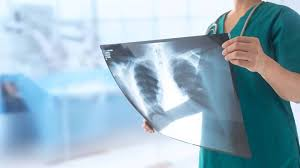

# <font color = "blue" > **Prepare Data** 🔎📐

In [ ]:
#@title Import Necessary Libs
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
#@title connect with drive
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#@title Decompressing images folders

PATH_COMPRESSED_FILE = "/content/drive/MyDrive/deep_learning/chest_disease.zip"
PATH_IMAGES_DATA = "/content/drive/MyDrive/deep_learning/chest_disease"
PATH_TRAIN_DATASET = f"{PATH_IMAGES_DATA}/train"
PATH_TEST_DATASET = f"{PATH_IMAGES_DATA}/test"
from zipfile import ZipFile
with ZipFile(PATH_COMPRESSED_FILE) as zipObj:
  zipObj.extractall(PATH_IMAGES_DATA)

In [ ]:
#@title Labels in Train data
print(f"Labels in Train data are : {os.listdir(PATH_TRAIN_DATASET)}")

Labels in Train data are : ['covid', 'normal', 'virus']


In [ ]:
#@title Train Data samples info
summary_table = PrettyTable()
summary_table.field_names = ['Label', '# training samples']

dict_train_labels_count = {}

for label in os.listdir(PATH_TRAIN_DATASET):

  dict_train_labels_count[label] = len(os.listdir(f"{PATH_TRAIN_DATASET}/{label}"))

  summary_table.add_row([label, dict_train_labels_count[label]])

train_samples_label = list(dict_train_labels_count.keys())
train_samples_Number = list(dict_train_labels_count.values())
total_train_samples = sum(dict_train_labels_count.values())
summary_table.add_row(["-----------", "--------------------"])
summary_table.add_row(["TOTAL", total_train_samples])

print("\nData samples :")
print(summary_table)
print(f"\n Training data are {total_train_samples} ")
print(f" The {train_samples_label[0]} data represent {round(train_samples_Number[0]/total_train_samples, 2)}")
print(f" The {train_samples_label[1]} data represent {round(train_samples_Number[1]/total_train_samples, 2)}")
print(f" The {train_samples_label[2]} data represent {round(train_samples_Number[2]/total_train_samples, 2)}")


Data samples :
+-------------+----------------------+
|    Label    |  # training samples  |
+-------------+----------------------+
|    covid    |         294          |
|    normal   |         468          |
|    virus    |         433          |
| ----------- | -------------------- |
|    TOTAL    |         1195         |
+-------------+----------------------+

 Training data are 1195 
 The covid data represent 0.25
 The normal data represent 0.39
 The virus data represent 0.36


In [ ]:
#@title Size of all Train data in megabytes
labels = os.listdir(PATH_TRAIN_DATASET)
total_train_size = sum(os.path.getsize(os.path.join(PATH_TRAIN_DATASET, label, image)) for label in labels for image in os.listdir(os.path.join(PATH_TRAIN_DATASET, label)))
print('Total Train data size = ', round(total_train_size / (1024 * 1024), 2), "Megabytes")

Total Train data size =  371.78 Megabytes


In [ ]:
#@title Size of all Test data in megabytes
# path of images inside test data
files = os.listdir(PATH_TEST_DATASET)
Total_file_size = 0
first_file_path = os.path.join(PATH_TEST_DATASET, files[0])
for index in range(len(PATH_TEST_DATASET)) :
     file_path = os.path.join(PATH_TEST_DATASET, files[index])
     # Getting the size of the first file
     Total_file_size += os.path.getsize(first_file_path)
print('Total Test data size = ', round(Total_file_size / (1024*1024), 2), "Megabytes")


Total Test data size =  8.56 Megabytes


In [ ]:
#@title plot function

# Function to plot four random examples from each label
labels = os.listdir(PATH_TRAIN_DATASET)
def plot_images(target_directory, num_examples=4, title="Data"):
    fig, axs = plt.subplots(len(labels), num_examples, figsize=(12, 10))
    fig.suptitle(title)

    # Iterate over each label
    for i, label in enumerate(labels):
        label_directory = os.path.join(target_directory, label)
        image_files = os.listdir(label_directory)
        np.random.shuffle(image_files)
        image_files = image_files[:num_examples]

        # Iterate over each image file
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(label_directory, image_file)
            image = plt.imread(image_path)

            # Plot the image
            ax = axs[i, j]
            ax.imshow(image)
            ax.axis('off')

            # Add label as the title
            if j == 0:
                ax.set_title(label)

    fig.tight_layout()
    plt.show()

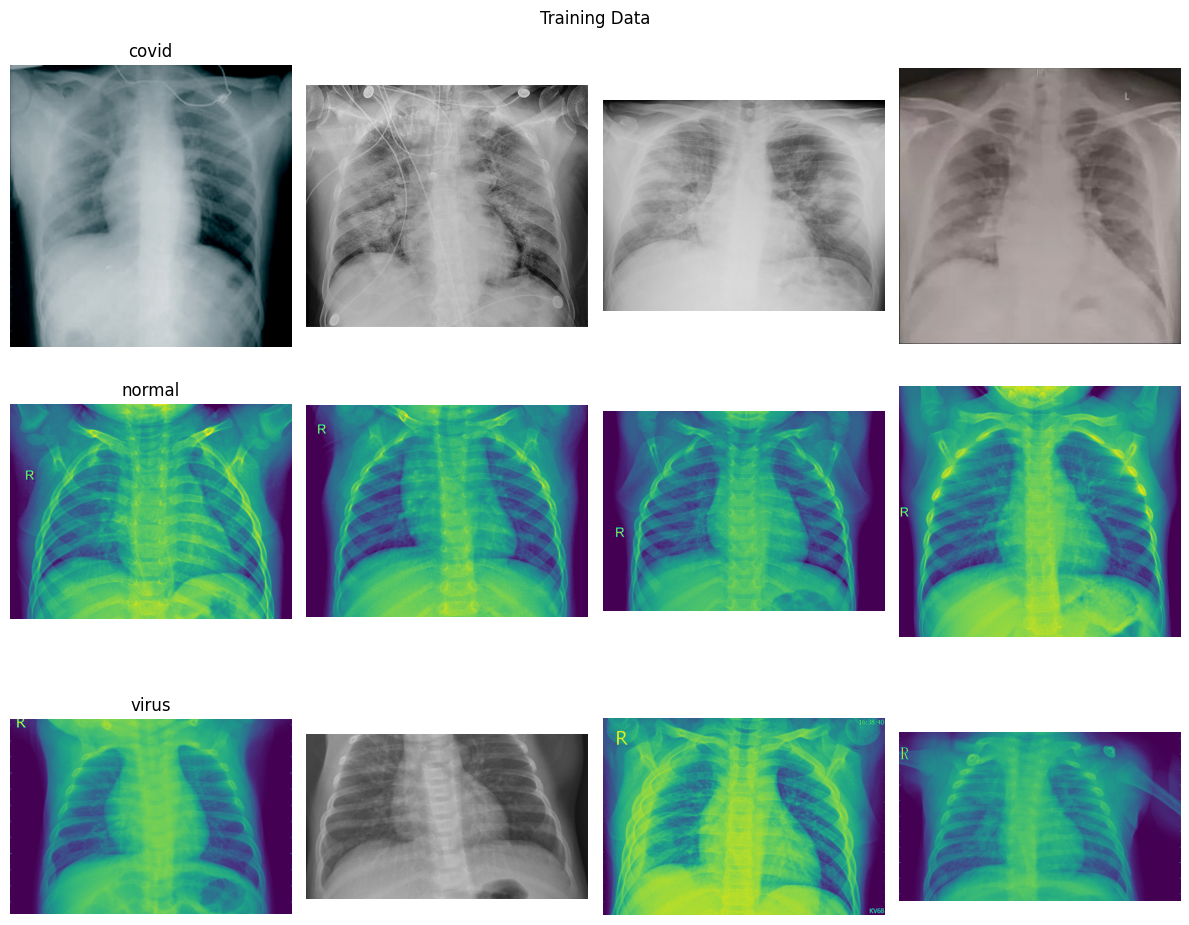

In [ ]:
#@title Training samples

plot_images(target_directory=PATH_TRAIN_DATASET,
            num_examples = 4,
            title="Training Data" )

In [ ]:
#@title Some Shapes of Images
import matplotlib.image as mpimg
for label in os.listdir(PATH_TRAIN_DATASET):
    print(f"------------------- {label} -----------------------")
    for ind in range(6):
        image_path = os.path.join(f"{PATH_TRAIN_DATASET}/{label}", os.listdir(f"{PATH_TRAIN_DATASET}/{label}")[ind])

        # Load image using matplotlib
        image = mpimg.imread(image_path)

        # Get shape of the image
        shape = image.shape
        print("Shape of the image:", shape)

------------------- covid -----------------------
Shape of the image: (1127, 1300, 3)
Shape of the image: (480, 640, 3)
Shape of the image: (480, 640, 3)
Shape of the image: (480, 640)
Shape of the image: (480, 640, 4)
Shape of the image: (480, 640, 3)
------------------- normal -----------------------
Shape of the image: (1228, 1480)
Shape of the image: (1264, 1762)
Shape of the image: (1519, 1682)
Shape of the image: (1120, 1400)
Shape of the image: (1870, 2458)
Shape of the image: (1761, 1845)
------------------- virus -----------------------
Shape of the image: (720, 1240)
Shape of the image: (1264, 1392)
Shape of the image: (736, 1248)
Shape of the image: (844, 1306)
Shape of the image: (1592, 1880)
Shape of the image: (519, 819, 3)


 **The shape of images is not the same + there are some images are grayscale and colorful (RGB)**

In [ ]:
#@title Function to apply Normalization steps
def normalize_image(image):
    # Normalize
    normalized_image = image / 255.0
    return normalized_image


In [ ]:
#@title Resize Training Image
train_resized_image = []
train_label = []
for label in os.listdir(PATH_TRAIN_DATASET):
    num_imagesEachLabel = len(os.listdir(f"{PATH_TRAIN_DATASET}/{label}"))
    for ind in range(num_imagesEachLabel):
        image_path = os.path.join(f"{PATH_TRAIN_DATASET}/{label}", os.listdir(f"{PATH_TRAIN_DATASET}/{label}")[ind])

        # Load image using OpenCV
        image = cv2.imread(image_path)

        # Resize the image to (224, 224)
        resized_image = cv2.resize(image, (224, 224))

        # Ensure that the image has 3 channels
        if  image.shape[2] != 3:
            resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
        normalized_image = normalize_image(resized_image)
        train_resized_image.append(normalized_image)
        train_label.append(label)


In [ ]:
#@title Resize Testing Image
test_resized_image = []

num_images = len(os.listdir(PATH_TEST_DATASET))
for ind in range(num_images):
        image_path = os.path.join(PATH_TEST_DATASET, os.listdir(PATH_TEST_DATASET)[ind])

        # Load image using OpenCV
        image = cv2.imread(image_path)

        # Resize the image to (224, 224)
        resized_image = cv2.resize(image, (224, 224))

        # Ensure that the image has 3 channels
        if  image.shape[2] != 3:
            resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
        normalized_image = normalize_image(resized_image)
        test_resized_image.append(normalized_image)



# <font color = "blue" > **Modeling** 🔧🛠️🏭

In [ ]:
#@title Import necessary libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder


In [ ]:
#@title Images and their labels
x = np.array(train_resized_image)
y = np.array(train_label )

In [ ]:
x_test = np.array(test_resized_image)

In [ ]:
#@title Split the data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#@title Print the shapes of the training and validation sets to verify
print("Training set shapes:", x_train.shape, y_train.shape)
print("Validation set shapes:", x_val.shape, y_val.shape)

Training set shapes: (956, 224, 224, 3) (956,)
Validation set shapes: (239, 224, 224, 3) (239,)


In [ ]:
pd.Series(y_train).value_counts()

normal    374
virus     347
covid     235
dtype: int64

In [ ]:
def f1_score(y_true, y_pred):
    # Convert probabilities to class predictions
    y_pred = tf.argmax(y_pred, axis=1)

    # Convert y_true to integer data type
    y_true = tf.argmax(y_true, axis=1)

    # Compute the confusion matrix
    conf_matrix = tf.math.confusion_matrix(y_true, y_pred, num_classes=num_classes)

    # Calculate true positives, false positives, and false negatives
    tp = tf.cast(tf.linalg.diag_part(conf_matrix), dtype=tf.float32)
    fp = tf.cast(tf.reduce_sum(conf_matrix, axis=0), dtype=tf.float32) - tp
    fn = tf.cast(tf.reduce_sum(conf_matrix, axis=1), dtype=tf.float32) - tp

    # Calculate precision, recall, and F1-score
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    # Calculate F1-score for each class
    f1_scores = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

    # Average F1-score across all classes
    f1_score = tf.reduce_mean(f1_scores)

    return f1_score


In [ ]:
#@title Model From Scratch
input_shape = (224, 224, 3)  # RGB
num_classes = 3
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((4, 4)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((3, 3)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_score])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 17, 17, 64)        0         
                                                                 
 dense_4 (Dense)             (None, 17, 17, 64)       

In [ ]:
#@title Encoding Labels
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train and y_val
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)



In [ ]:
#@title Encoding Labels
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_train and y_val
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=num_classes)


In [ ]:
y_val_one_hot.shape, y_train_one_hot.shape, x_train.shape, x_val.shape

((239, 3), (956, 3), (956, 224, 224, 3), (239, 224, 224, 3))

In [ ]:
#@title Fit the Model
# Define the number of epochs
num_epochs = 10
# Fit the model
history = model.fit(x_train, y_train_one_hot, epochs=num_epochs, validation_data=(x_val, y_val_one_hot))

Epoch 1/10
30/30 [==============================] - 41s 1s/step - loss: 1.8177 - f1_score: 0.4563 - val_loss: 1.5358 - val_f1_score: 0.4427
Epoch 2/10
30/30 [==============================] - 41s 1s/step - loss: 1.2255 - f1_score: 0.7385 - val_loss: 0.9937 - val_f1_score: 0.8219
Epoch 3/10
30/30 [==============================] - 36s 1s/step - loss: 1.0014 - f1_score: 0.8027 - val_loss: 0.8094 - val_f1_score: 0.8354
Epoch 4/10
30/30 [==============================] - 38s 1s/step - loss: 0.7799 - f1_score: 0.8595 - val_loss: 0.6466 - val_f1_score: 0.8892
Epoch 5/10
30/30 [==============================] - 39s 1s/step - loss: 0.6590 - f1_score: 0.8700 - val_loss: 0.6166 - val_f1_score: 0.8715
Epoch 6/10
30/30 [==============================] - 37s 1s/step - loss: 0.5944 - f1_score: 0.8901 - val_loss: 0.5315 - val_f1_score: 0.8985
Epoch 7/10
30/30 [==============================] - 38s 1s/step - loss: 0.5250 - f1_score: 0.9043 - val_loss: 0.4545 - val_f1_score: 0.9221
Epoch 8/10
30/30 [==

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

17/17 [==============================] - 6s 317ms/step


In [ ]:
#@title Predicted Labels
predicted_labels

array([2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1,
       2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2,

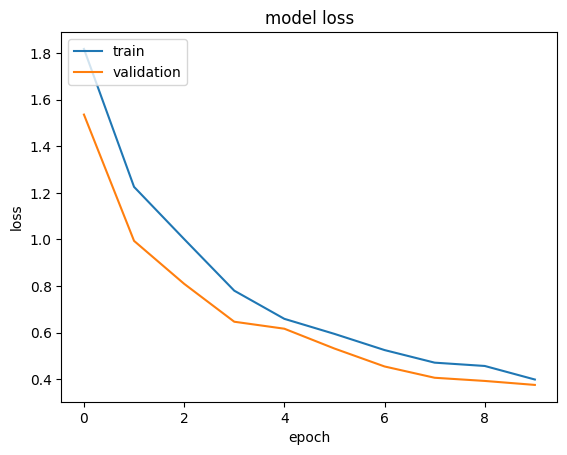

In [ ]:
#@title Train vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

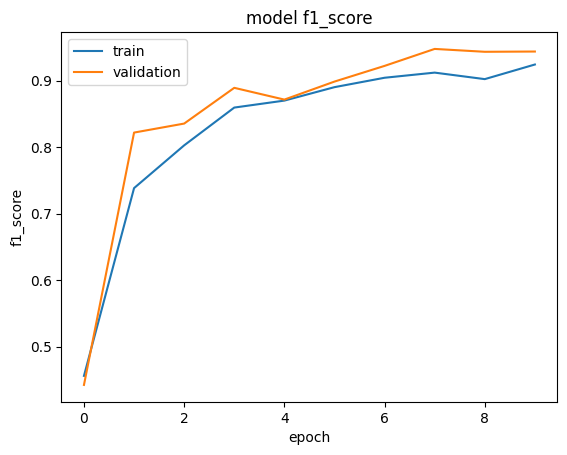

In [ ]:
#@title Train vs Validation F1-score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#@title VGG16 Model
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new top layer for classification
bm = base_model.output
flatten_layer = Flatten()(bm)  # Add a flattening layer
dense1 = Dense(64, activation='relu')(flatten_layer)
dropout = Dropout(0.5)(dense1)  # Add a dropout layer
predictions = Dense(3, activation='softmax')(dropout)  # Output layer with 3 classes

# Combine the base model and top layers into a new model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=[f1_score])

# Display the model summary
model_vgg16.summary()


58889256/58889256 [==============================] - 1s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#@title Fit VGG16
from keras.callbacks import EarlyStopping

# Define the number of epochs
num_epochs = 5

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping
history = model_vgg16.fit(x_train, y_train_encoded, epochs=num_epochs, validation_data=(x_val, y_val_encoded), callbacks=[early_stopping])


Epoch 1/5
30/30 [==============================] - 636s 21s/step - loss: 0.8982 - f1_score: 0.9048 - val_loss: 0.3729 - val_f1_score: 0.9896
Epoch 2/5
30/30 [==============================] - 653s 22s/step - loss: 0.4276 - f1_score: 0.9846 - val_loss: 0.2279 - val_f1_score: 0.9896
Epoch 3/5
30/30 [==============================] - 629s 21s/step - loss: 0.3294 - f1_score: 0.9923 - val_loss: 0.1996 - val_f1_score: 1.0000
Epoch 4/5
30/30 [==============================] - 627s 21s/step - loss: 0.2901 - f1_score: 0.9937 - val_loss: 0.1638 - val_f1_score: 0.9946
Epoch 5/5
30/30 [==============================] - 631s 21s/step - loss: 0.2902 - f1_score: 0.9962 - val_loss: 0.1449 - val_f1_score: 0.9946


In [ ]:
#@title Get the predicted probabilities for each sample
predictions = model_vgg16.predict(x_test)

17/17 [==============================] - 269s 16s/step


In [ ]:
#@title Get the predicted labels for each sample
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
#@title Predicted Labels
predicted_labels

array([2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2,

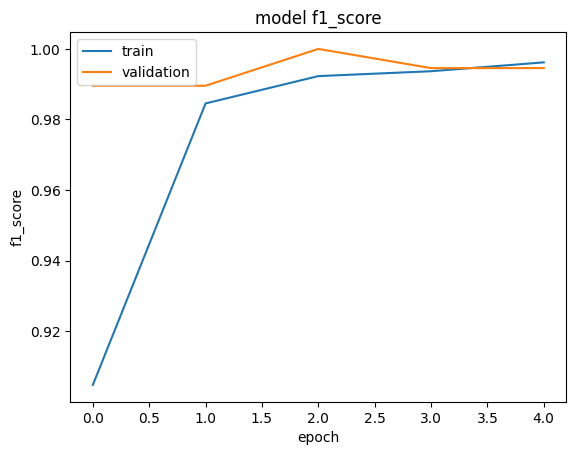

In [ ]:
#@title Train vs Validation F1-score

plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

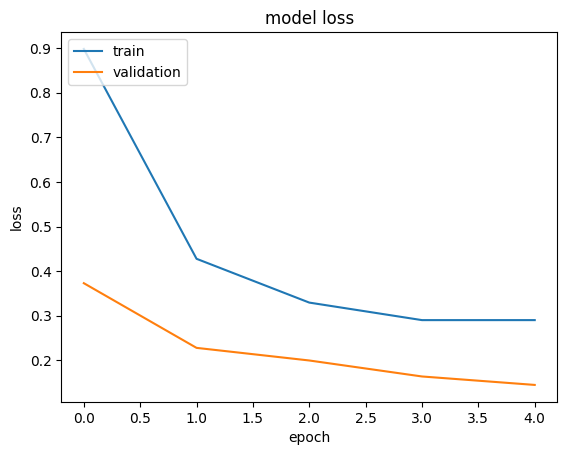

In [ ]:
#@title Train vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#@title Create dataframe for Test Data
# create image col
df_test = pd.DataFrame(columns=["image"])
idx = 0

file_images = os.listdir(f"{PATH_TEST_DATASET}")
for image_path in file_images:
    df_test.loc[idx, "image"] = image_path
    idx+=1
# Labels col
df_test.reset_index(drop=True, inplace=True)
df_test["label"] = pd.Series(predicted_labels)
df_test.label.replace({0:"covid", 1: "normal", 2: "virus"}, inplace = True)

In [ ]:
# download predicted file
df_test.to_csv('df_test.csv', index=False)